In [2]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model as lm
import sklearn.cross_validation as cv
import sklearn.grid_search as gs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sns.set_style("darkgrid", rc=custom_style)

In [85]:
train = pd.read_csv('data/titanic_train.csv')
test = pd.read_csv('data/titanic_test.csv')

# train[train.columns[[2, 4, 5, 1]]]

data = train[['Sex', 'Age', 'Pclass', 'Survived']].copy()
data['Sex'] = data['Sex'] == 'female'
data = data.dropna()

data_np = data.astype(np.int32).values
X = data_np[:, :-1]
y = data_np[:, -1]
data.tail()

,Sex,Age,Pclass,Survived
885,True,39.0,3,0
886,False,27.0,2,0
887,True,19.0,1,1
889,False,26.0,1,1
890,False,32.0,3,0


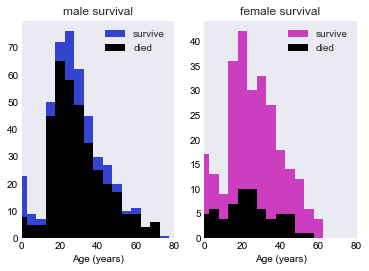

In [117]:
female = X[:,0] == 1
survived = y == 1
age = X[:, 1]

bins_ = np.arange(0, 81, 5)
S = {'male': np.histogram(age[survived & ~female], bins=bins_)[0],
     'female': np.histogram(age[survived & female], bins=bins_)[0]
    }
D = {'male': np.histogram(age[~survived & ~female], bins=bins_)[0],
     'female': np.histogram(age[~survived & female], bins=bins_)[0]
    }

bins = bins_[:-1]
for i, sex, color in zip((0,1), ('male', 'female'), ('#3345d0', '#cc3dc0')):
#     plt.figure(figsize=(8,6))
    plt.subplot(121+i)
    plt.bar(bins, S[sex], bottom=D[sex], color=color, width=5, label='survive')
    plt.bar(bins, D[sex], color='k', width=5, label='died')
    plt.xlim(0, 80)
    plt.grid(None)
    plt.title(sex + " survival")
    plt.xlabel("Age (years)")
    plt.legend()

In [142]:
(X_train, X_test, y_train, y_test) = cv.train_test_split(X, y, test_size=.05)
logreg = lm.LogisticRegression()

In [144]:
logreg.fit(X_train, y_train)
y_predicted = logreg.predict(X_test)

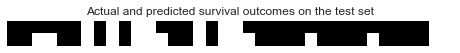

In [148]:
plt.figure(figsize=(8,6))
plt.imshow(np.vstack((y_test, y_predicted)), interpolation='none', cmap='bone')
plt.xticks([]); plt.yticks([])
plt.title(("Actual and predicted survival " "outcomes on the test set"))

In [149]:
cv.cross_val_score(logreg, X, y)

array([ 0.78661088,  0.78991597,  0.78059072])

In [150]:
grid = gs.GridSearchCV(logreg, {'C': np.logspace(-5, 5, 50)})
grid.fit(X_train, y_train)
grid.best_params_

{'C': 13.257113655901108}

In [151]:
cv.cross_val_score(grid.best_estimator_, X, y)

array([ 0.78661088,  0.79831933,  0.78059072])